In [1]:
#Logisitc Regression

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt


In [3]:
def initialize_parameters(dim):
    #initialize theta with zeros
    theta = np.zeros((dim,1))
    return theta

In [4]:
def load_data(data_path):
    data_set = np.genfromtxt(data_path, delimiter=',')
    return data_set

In [5]:
def visualize_data(data, title, title_x, title_y, isTheta = False, theta = None):
    X = data[:,0]
    y = data[:,1]
    plt.scatter(X.flatten(),y.flatten(), label='training data')
    plt.title(title)
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    if(isTheta):
        m = X.shape[0]
        X_train = data_set[:,0].reshape((m,1))
        one = np.ones((m, 1))
        X_train = np.concatenate((one, X_train), axis = 1)
        plt.plot(X.flatten(), np.dot(X_train, theta),color='red', label = 'hypothesis')
    plt.show()

In [6]:
def compute_cost(X, y, theta = [[0],[0]]):
    m = X.shape[0]
    h = np.dot(X, theta)
    J = np.sum(np.square(h-y)) / (2*m)
    return J

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = X.shape[0]
    J_history = np.zeros(iterations)
    
    for i in range(iterations):
        h = np.dot(X, theta)
        theta = theta - alpha * (1/m) * np.dot(X.T, h-y)
        J_history[i] = compute_cost(X, y, theta)
    
    return (theta, J_history)

In [8]:
def predict(x, theta):
    h = np.dot(x, theta)
    return h

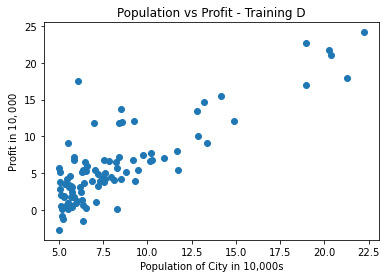

Cost wih theta=[0,0] =  32.072733877455676


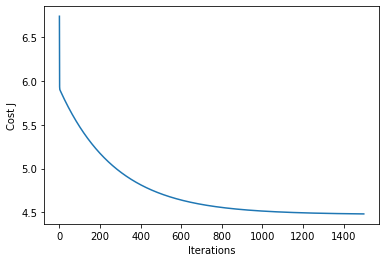

Value of theta with gradient descent: [[-3.63029144]
 [ 1.16636235]]


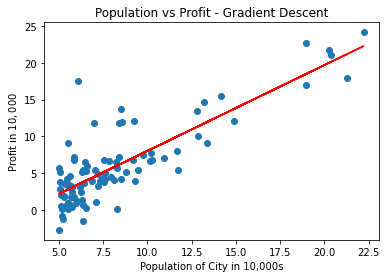

Value of theta with normal equation: [[-3.89578088]
 [ 1.19303364]]


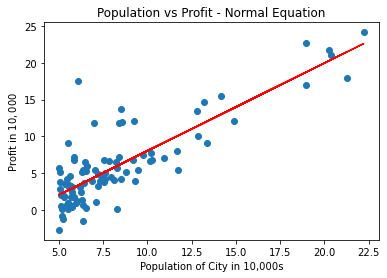

Predict profit with population of 150,000: 13.86514381562937


In [9]:
if __name__ == "__main__":
    #load dataset
    data_path = 'data1.csv'
    data_set = load_data(data_path)
    m = data_set.shape[0]
    n = data_set.shape[1]
    X_train = data_set[:,0].reshape((m,1))
    Y_train = data_set[:,1].reshape((m,1))
    
    #visualize data
    visualize_data(data_set, 'Population vs Profit - Training D', 'Population of City in 10,000s', 'Profit in $10,000$')
    
    #add 1's column to X
    m = X_train.shape[0]
    one = np.ones((X_train.shape[0], 1))
    X = np.concatenate((one, X_train), axis = 1)
    
    #initialize parameters
    theta = initialize_parameters(X.shape[1])
    
    
    
    #check cost
    J = compute_cost(X, Y_train, theta)
    print('Cost wih theta=[0,0] = ', J)    
    
    #gradient descent 
    alpha = 0.01
    iterations = 1500
    theta, J_cost = gradient_descent(X, Y_train, theta, alpha, iterations)
    
    #plot costs over iterations
    plt.plot(J_cost)
    plt.ylabel('Cost J')
    plt.xlabel('Iterations')
    plt.show()
    print('Value of theta with gradient descent:',theta)
    
    #visualize the hypothesis
    visualize_data(data_set, 'Population vs Profit - Gradient Descent', 'Population of City in 10,000s', 'Profit in $10,000$', True, theta)
    
    
    #normal equation
    theta_equation = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y_train))
    print('Value of theta with normal equation:',theta_equation)
    visualize_data(data_set, 'Population vs Profit - Normal Equation', 'Population of City in 10,000s', 'Profit in $10,000$',True, theta_equation)
    
    
    #predict 
    x = [[1, 15]]
    print("Predict profit with population of 150,000:", predict(x, theta)[0][0])